# Project 2 - Ransac for Image Alignment
### Tarun Ravada

For this project I designed a system for image aligment via fast matching of local features. The system takes 2 input images of a similar scene and generatres a panaroma of the two images by matching features. 
This notebook will serve as an interface to demostrate the system. The necessary algorithms have been implemented in a seperate python file and imported to this notebook.

### The main steps for this system are
    Detecting SIFT keypoints and descriptors for two images
    Finding matches between the descriptors for both images
    Estimating a homography matrix using the RANSAC algorithm
    Applying a transform on the first image using the homography matrix
    Aligning the first image with the transformed second image

In [12]:
# matplotlib, PIL, and IPython libraries will be used to load and display images
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display 

# import methods from python file
from stitching import get_sift, get_matches, draw_matches, get_homography, transform_and_stitch, thumbnail

In [13]:
# set directory of images to variables

# image_1_dir = 'images/yosemite1.jpg'
# image_2_dir = 'images/yosemite2.jpg'

image_1_dir = 'images/room1.jpg'
image_2_dir = 'images/room2.jpg'

# image_1_dir = 'images/building1.jpg'
# image_2_dir = 'images/building2.jpg'

#load images as array
image1 = plt.imread(image_1_dir)
image2 = plt.imread(image_2_dir)

#use the thumbnail method to resize images to fit display
#images are scaled to width
display_width = 400

### The first image is displayed below

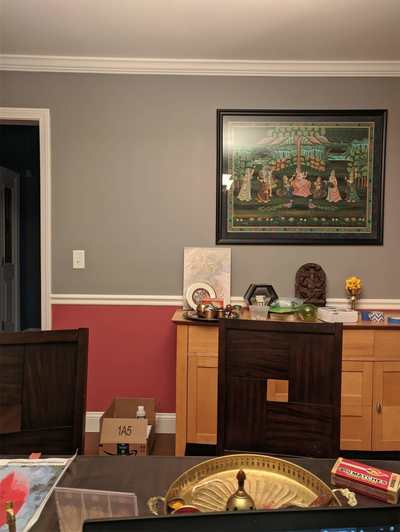

In [14]:
display(thumbnail(image1,display_width))

### The second image is displayed below

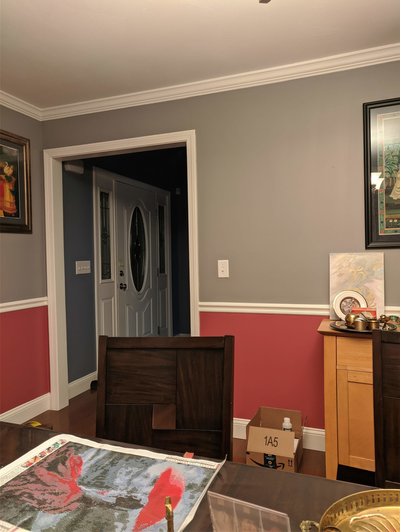

In [15]:
display(thumbnail(image2,display_width))

### Calculate SIFT keypoints and features
Using the get_sift methods we can calculate the key points and descriptors for both our imput images
  
    The get_sift method
        takes the two images as a numpy array
        returns 4 lists of keypoints and descriptors

In [16]:
key_points_1, key_points_2, desc_1, desc_2 = get_sift(image1, image2)

### Find matches in descriptors between both images
Using the get_matches method we will find matching features between the two images. The methods first finds the 2 best matches and applies ratio testing to filter out bad matches.
    
    The get_matches method
        takes 2 lists of descriptors to match, ratio to be used for ratio testing
        returns list of mathes between two descriptor lits    

In [17]:
ratio = 0.4 # good value between 0.3 - 0.8
matches = get_matches(desc_1, desc_2, ratio)

### Use draw_features to visualize matches between the two images

In [18]:
feature_matches = draw_matches(matches, key_points_1, key_points_2, image1, image2)

### The image below shows the 15 top matches

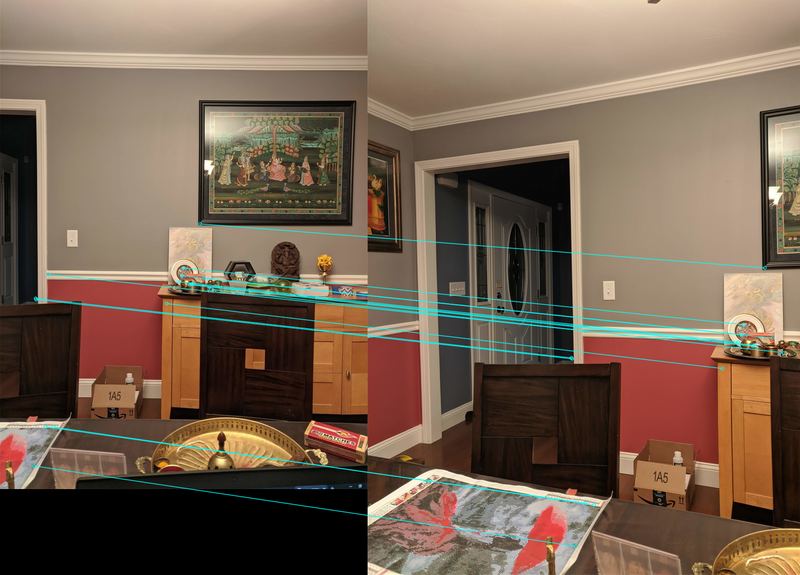

In [19]:
display(thumbnail(feature_matches,display_width*2))

### Estimate Homography matrix
The get_homography method uses the RANSAC algorithm to estimate a homography matrix, based on matching features between the two images

    The get_homography method
        takes list of keypoints for each image and the list of matches
        returns the estimated homography matrix

In [20]:
matrix= get_homography(key_points_1, key_points_2, matches)

# print the homography matrix
matrix

array([[ 7.92332340e-01,  5.41350278e-03,  3.32484927e+02],
       [-2.73774904e-01,  1.02646168e+00,  8.83699001e+01],
       [-4.20041239e-04, -3.17309013e-05,  1.00000000e+00]])

### Apply transfomration and stitch images
The transform_and_stitch method applies a transformation on the first image using the homography matrix. The transformed first image and the second image are then overalpped and returned as new image.

    The transform_and_stitch method
        takes the two original images and the homography matrix
        returns stitched final image

In [21]:
result = transform_and_stitch(image1, image2, matrix)

### The final image with the two imput images aligned and stitched together is shown below

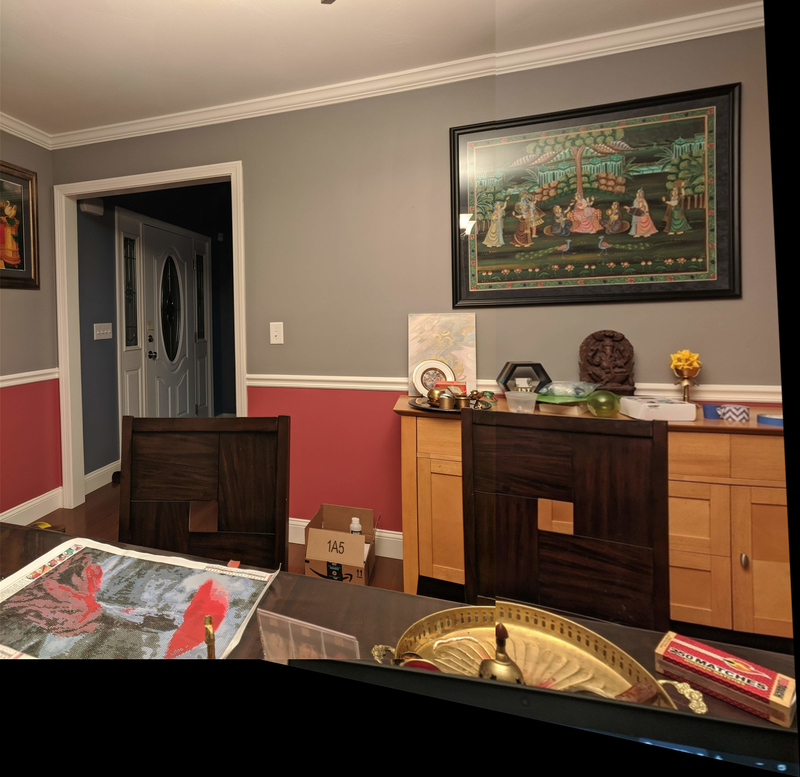

In [22]:
display(thumbnail(result,display_width*2))